In [1]:
from dqn_utils.models import *
from dqn_utils.utils import define_env, train, optimize_model
from adabyron_environment.AdaByronDEMO import AdaByronDEMO
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

Loading models...
Models not found, creating new ones...


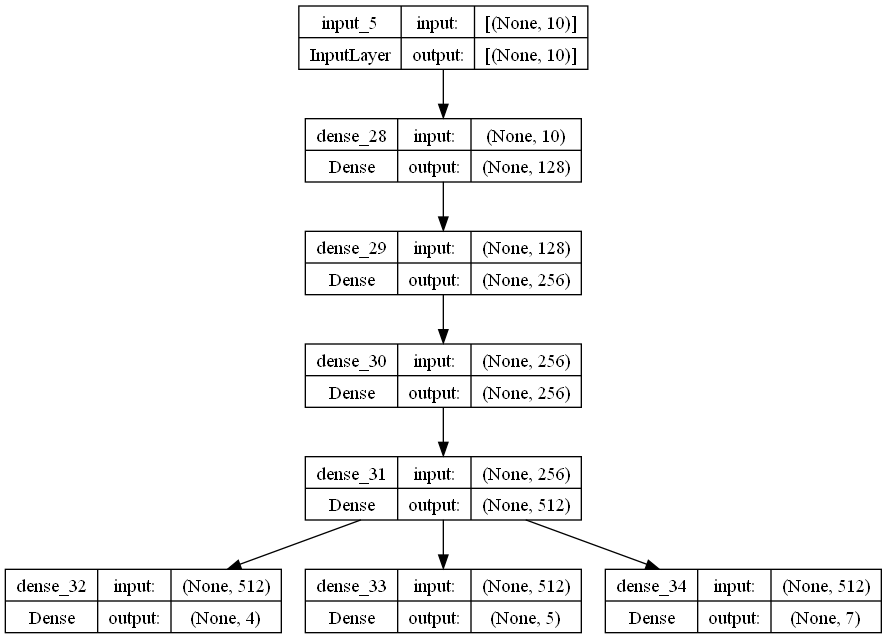

In [4]:
env, policy_network, target_network, num_actions  = define_env("test")

keras.utils.plot_model(policy_network, to_file='policy_network.png', show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96)